# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th and come to class . Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [5]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

In [6]:
#!rm SUSY.csv

In [7]:
#!gunzip SUSY.csv.gz

In [8]:
#ls -lh

The data is provided as a comma separated file.

In [10]:
#filename="SUSY.csv"
# print out the first 5 lines using unix head command
#!head -5  "SUSY.csv"

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [12]:
#!ls -lh

We see that we have 5 million datapoints.

In [14]:
#!wc -l SUSY.csv

We create a new file of the first half million. This is sufficient for our needs in this lab:

In [16]:
#!head -500000 SUSY.csv > SUSY-small.csv

In [17]:
#ls -lh

In [18]:
#! wc -l SUSY-small.csv

Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [21]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [23]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [24]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [25]:
FeatureNames

['M_Delta_R',
 'axial_MET',
 'MET_rel',
 'M_R',
 'dPhi_r_b',
 'R',
 'S_R',
 'M_TR_2',
 'MT2',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [29]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [31]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [33]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


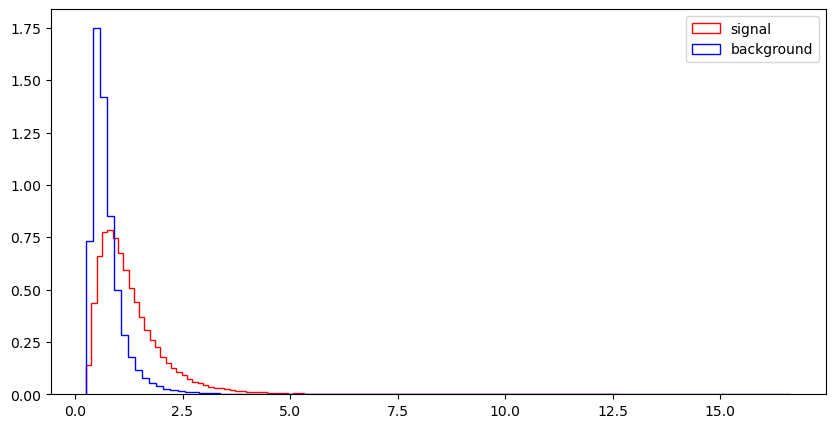

l_1_eta


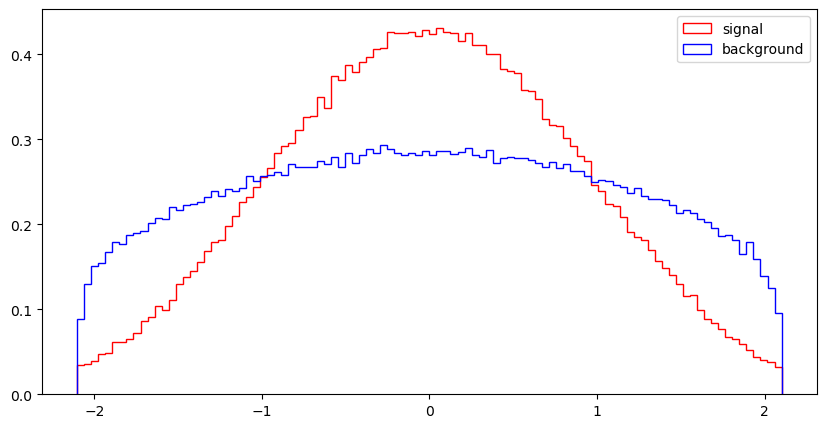

l_1_phi


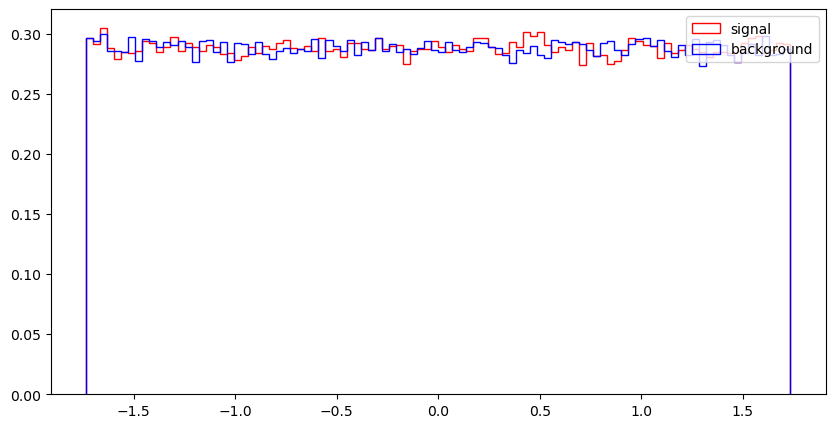

l_2_pT


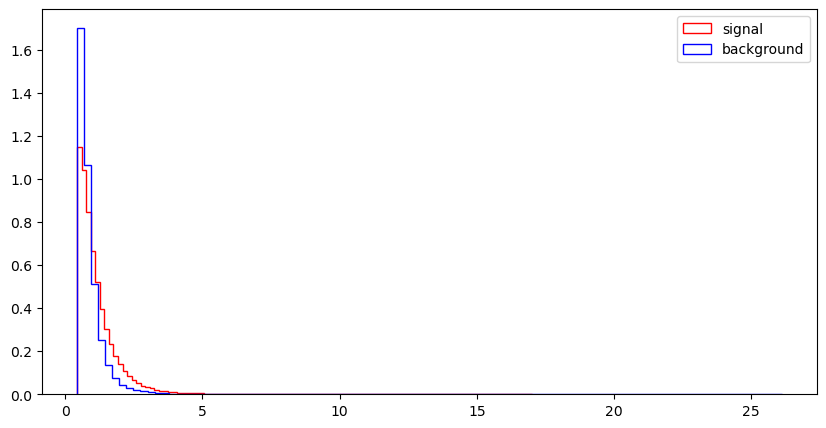

l_2_eta


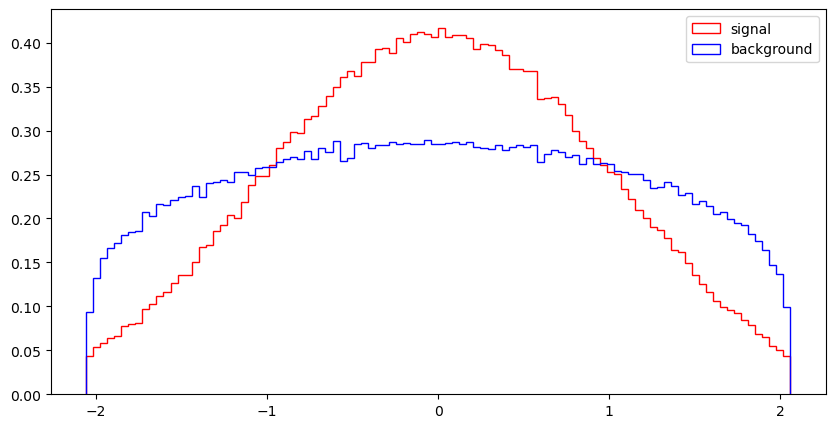

l_2_phi


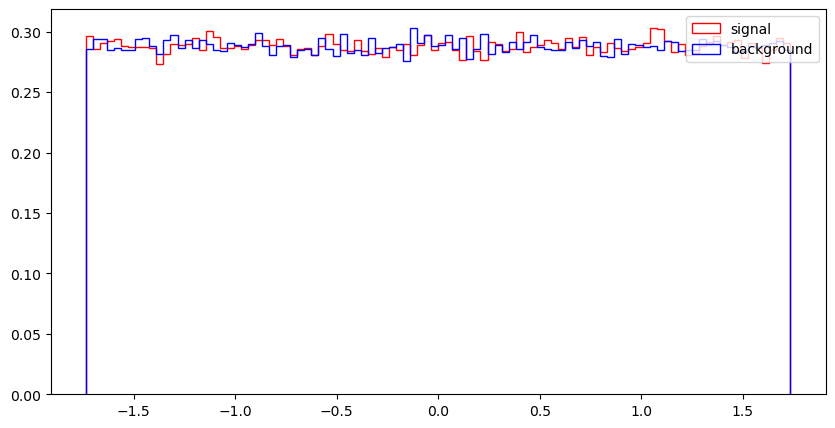

MET


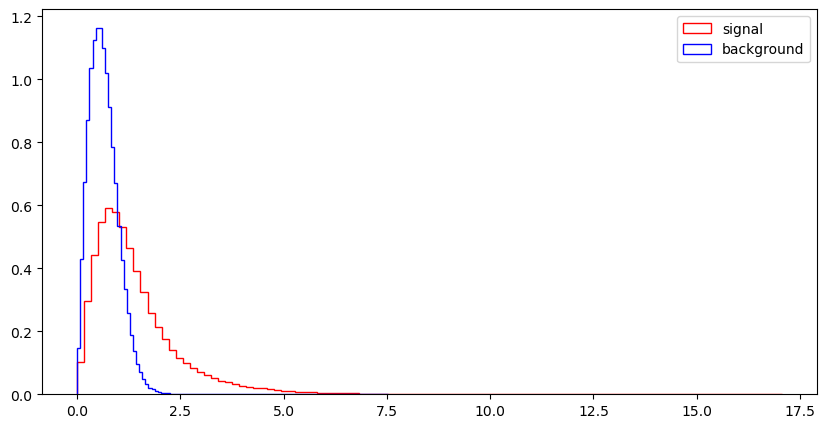

MET_phi


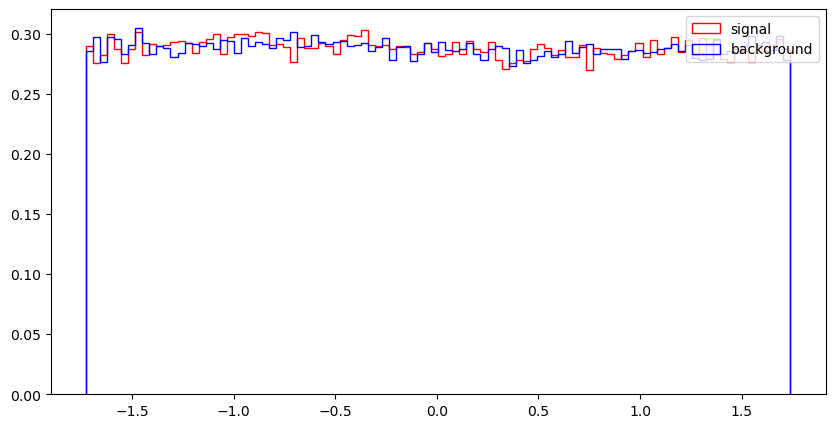

MET_rel


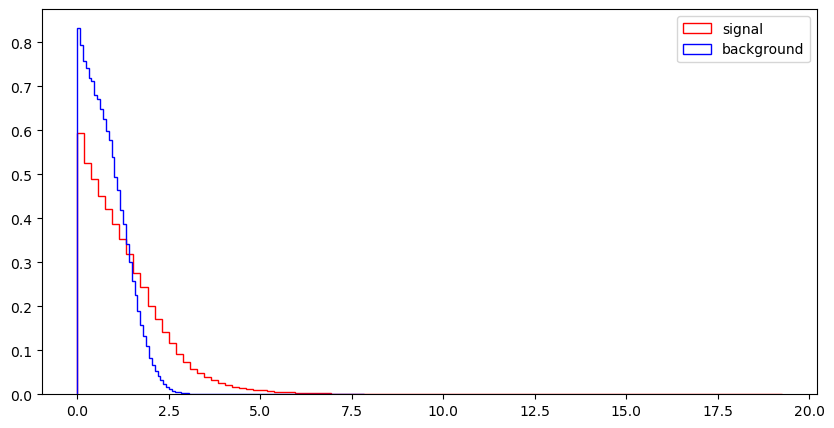

axial_MET


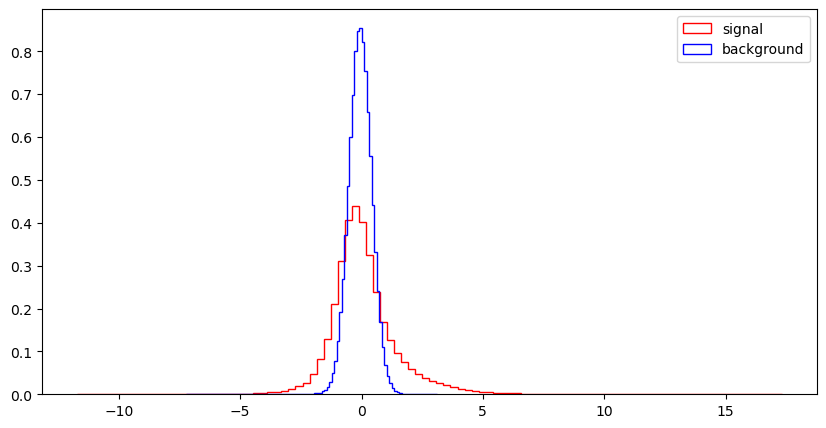

M_R


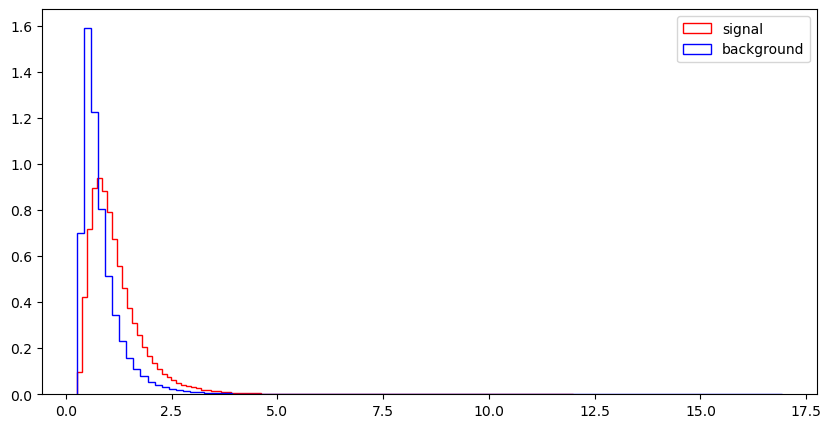

M_TR_2


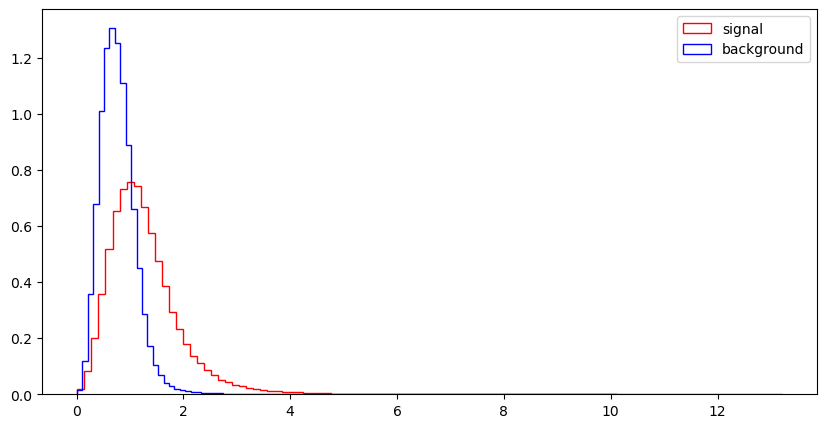

R


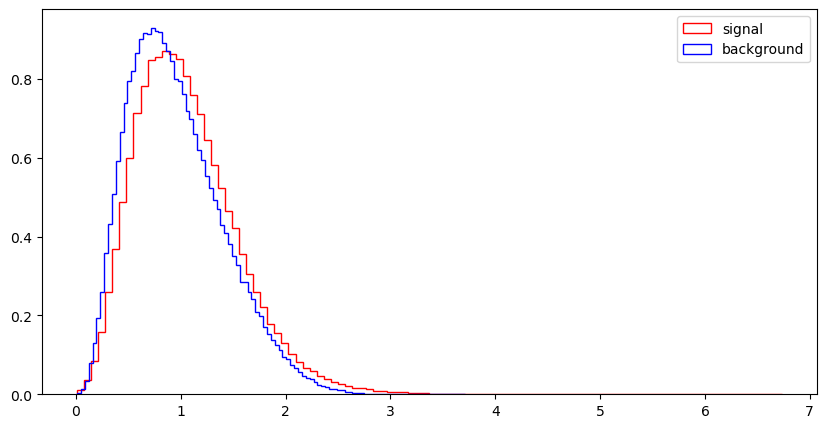

MT2


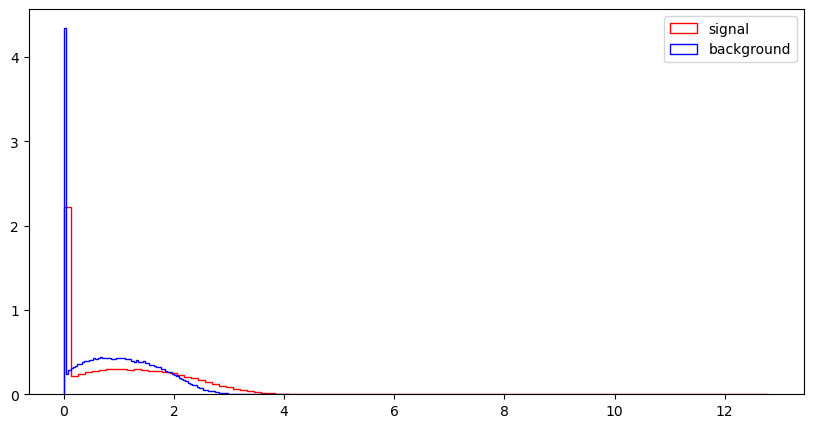

S_R


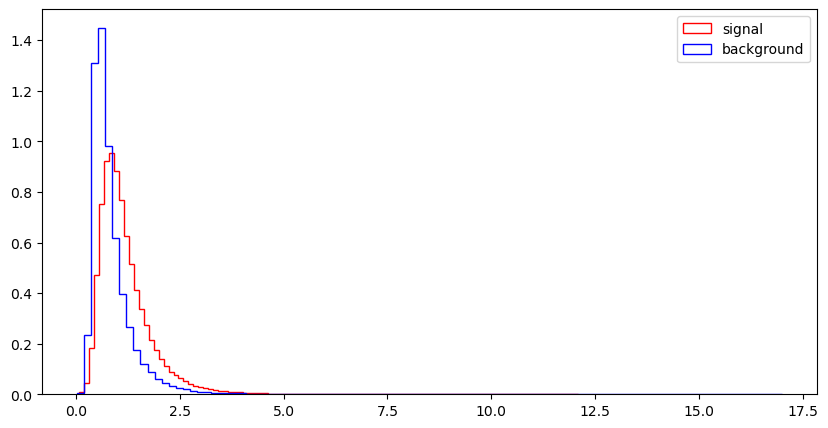

M_Delta_R


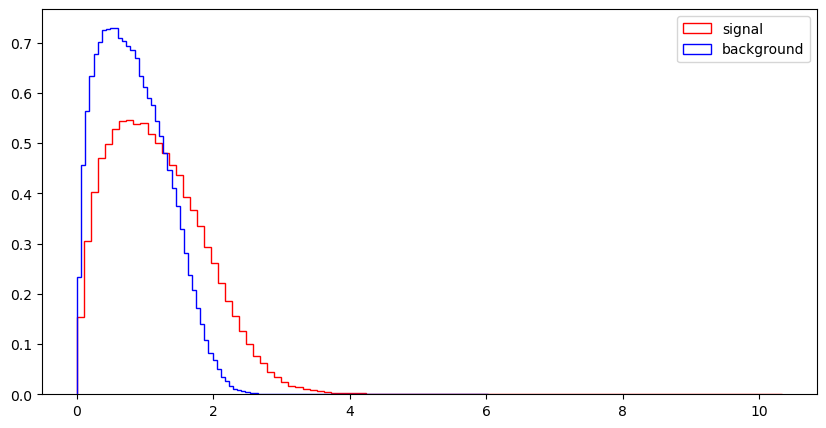

dPhi_r_b


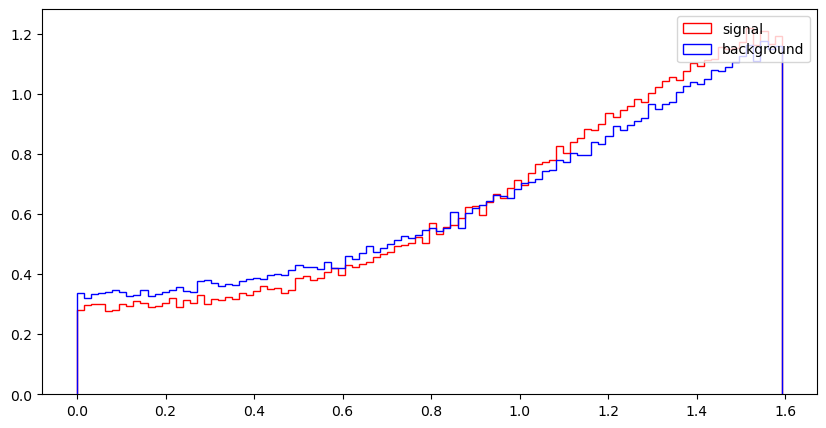

cos_theta_r1


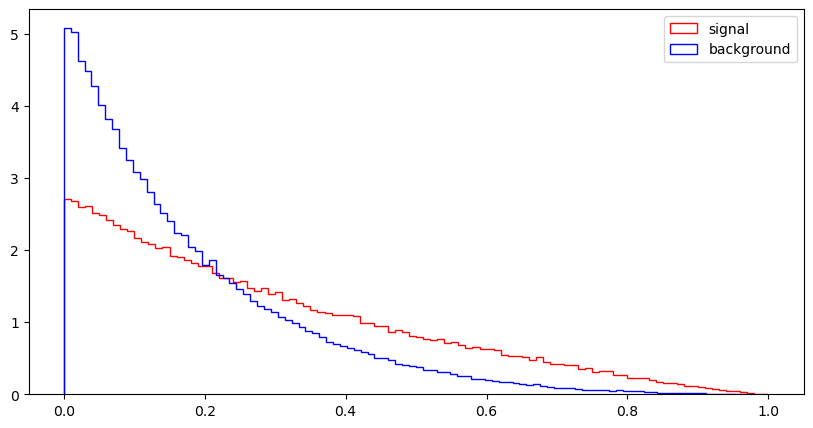

In [35]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

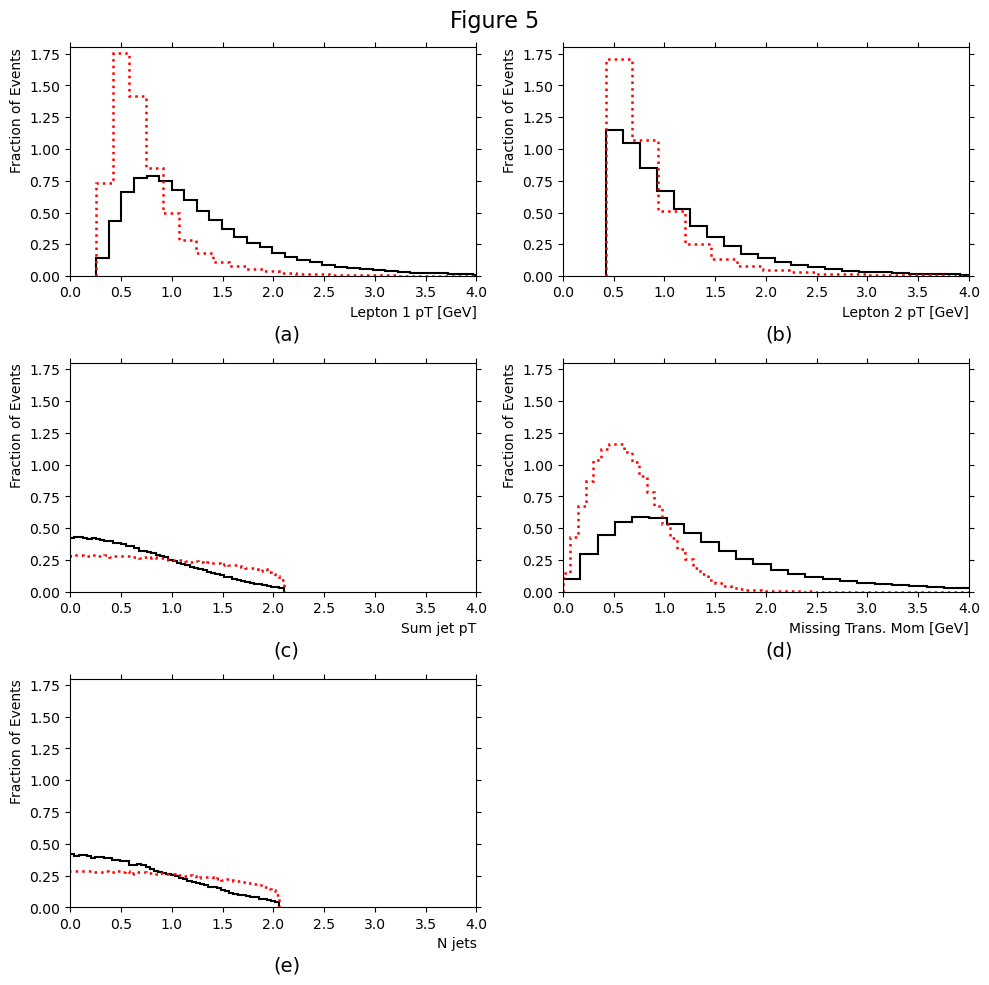

In [37]:
cols = ["l_1_pT","l_2_pT","l_1_eta","MET","l_2_eta"] #low level features
x_vars = ["Lepton 1 pT [GeV]","Lepton 2 pT [GeV]","Sum jet pT","Missing Trans. Mom [GeV]","N jets"] #axis names from paper
titles = ["(a)","(b)","(c)","(d)","(e)"]

plt.figure(figsize=(10,10))
for ind,col in enumerate(cols):
    plt.subplot(3,2,ind+1)
    plt.hist(np.array(df_sig[col]),bins=100,histtype="step", linewidth = 1.5,
             color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[col]),bins=100,histtype="step", linestyle=":",
             linewidth = 1.8, color="red", label="background",density=1,stacked=True)
    plt.ylabel("Fraction of Events",loc="top")
    plt.xlabel(x_vars[ind],loc="right")
    plt.tick_params(top=True,right=True)
    plt.text(2,-0.5,titles[ind],fontsize=14)
    plt.xlim(0,4)
    plt.ylim(0,1.8)
plt.suptitle("Figure 5",fontsize=16)
plt.tight_layout()
plt.show()

In [38]:
len(FeatureNames)

10

In [39]:
df.columns

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')

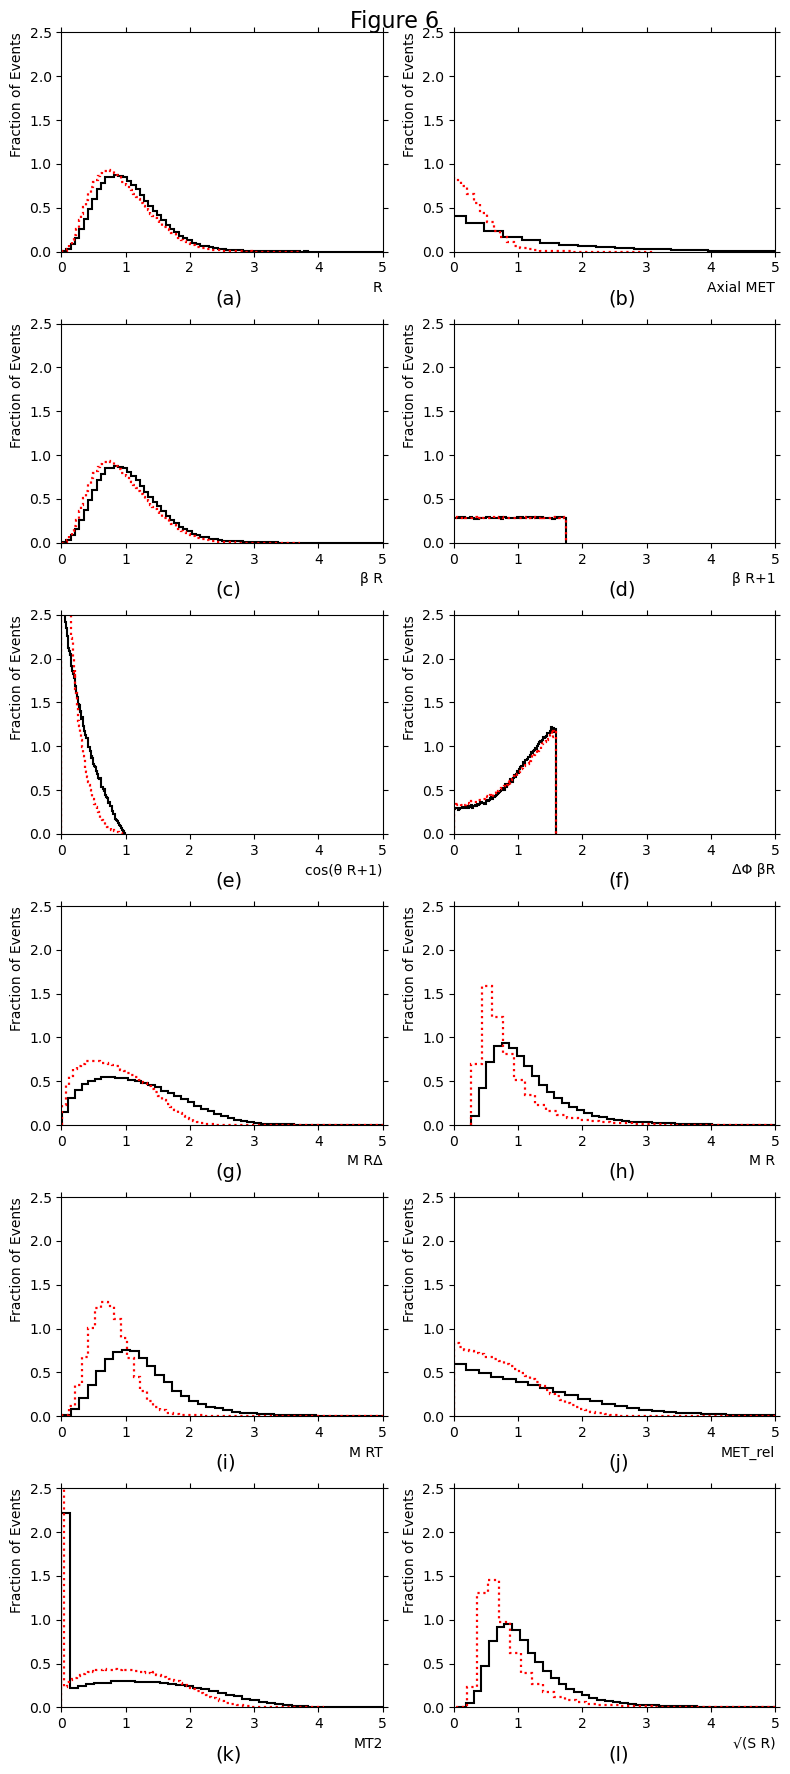

In [40]:
cols2=["R","axial_MET","R","MET_phi","cos_theta_r1","dPhi_r_b","M_Delta_R","M_R","M_TR_2","MET_rel","MT2","S_R"] #high level features
x_vars = ["R","Axial MET","β R","β R+1","cos(θ R+1)","ΔΦ βR","M RΔ","M R","M RT","MET_rel","MT2","√(S R)"]
titles = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)"]


plt.figure(figsize=(8,18))
for ind,col in enumerate(cols2):
    plt.subplot(6,2,ind+1)
    plt.hist(np.array(df_sig[col]),bins=100,histtype="step", linewidth = 1.5,
             color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[col]),bins=100,histtype="step", linestyle=":",
             linewidth = 1.6, color="red", label="background",density=1,stacked=True)
    
    plt.ylabel("Fraction of Events",loc="top")
    plt.xlabel(x_vars[ind],loc="right")
    plt.tick_params(top=True,right=True)
    plt.text(2.4,-0.6,titles[ind],fontsize=14)
    
    plt.xlim(0,5)
    plt.ylim(0,2.5)
plt.suptitle("Figure 6",fontsize=16)
plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

### Part a

In [43]:
#low level features
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [44]:
def pairplot(df,cols,title=None):
    plt.figure(figsize=(12,12))
    grid_size = len(cols)
    counter = 1
    for ind,y_col in enumerate(cols):
        for ind2,x_col in enumerate(cols):
            if ind == ind2:
                plt.subplot(grid_size,grid_size,counter)
                counter+=1
                df[y_col].hist(grid=False,)
                if ind2%grid_size == 0:
                    plt.ylabel(y_col)
                if (ind+1) == grid_size:
                    plt.xlabel(x_col)
                
                #left graphs
                if ind2 == 0:
                    plt.ylabel(y_col)
                    plt.tick_params(left=True,labelleft=True,bottom=True,labelbottom=False)
                else:
                    plt.tick_params(labelleft=False,bottom=True,labelbottom=False)
                #bottom graphs
                if (ind+1) == grid_size:
                    plt.xlabel(x_col)
                    plt.tick_params(left=False,bottom=True,labelbottom=True)
                continue
                
            plt.subplot(grid_size,grid_size,counter)
            plt.scatter(x=df[x_col],y=df[y_col],alpha=0.4)
            counter+=1

            #left-most graphs
            if ind2 == 0:
                plt.ylabel(y_col)
                plt.tick_params(left=True,labelleft=True,bottom=True,labelbottom=False)
            else:
                plt.tick_params(labelleft=False,bottom=True,labelbottom=False)
            #bottom graphs
            if (ind+1) == grid_size:
                plt.xlabel(x_col)
                plt.tick_params(left=False,bottom=True,labelbottom=True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

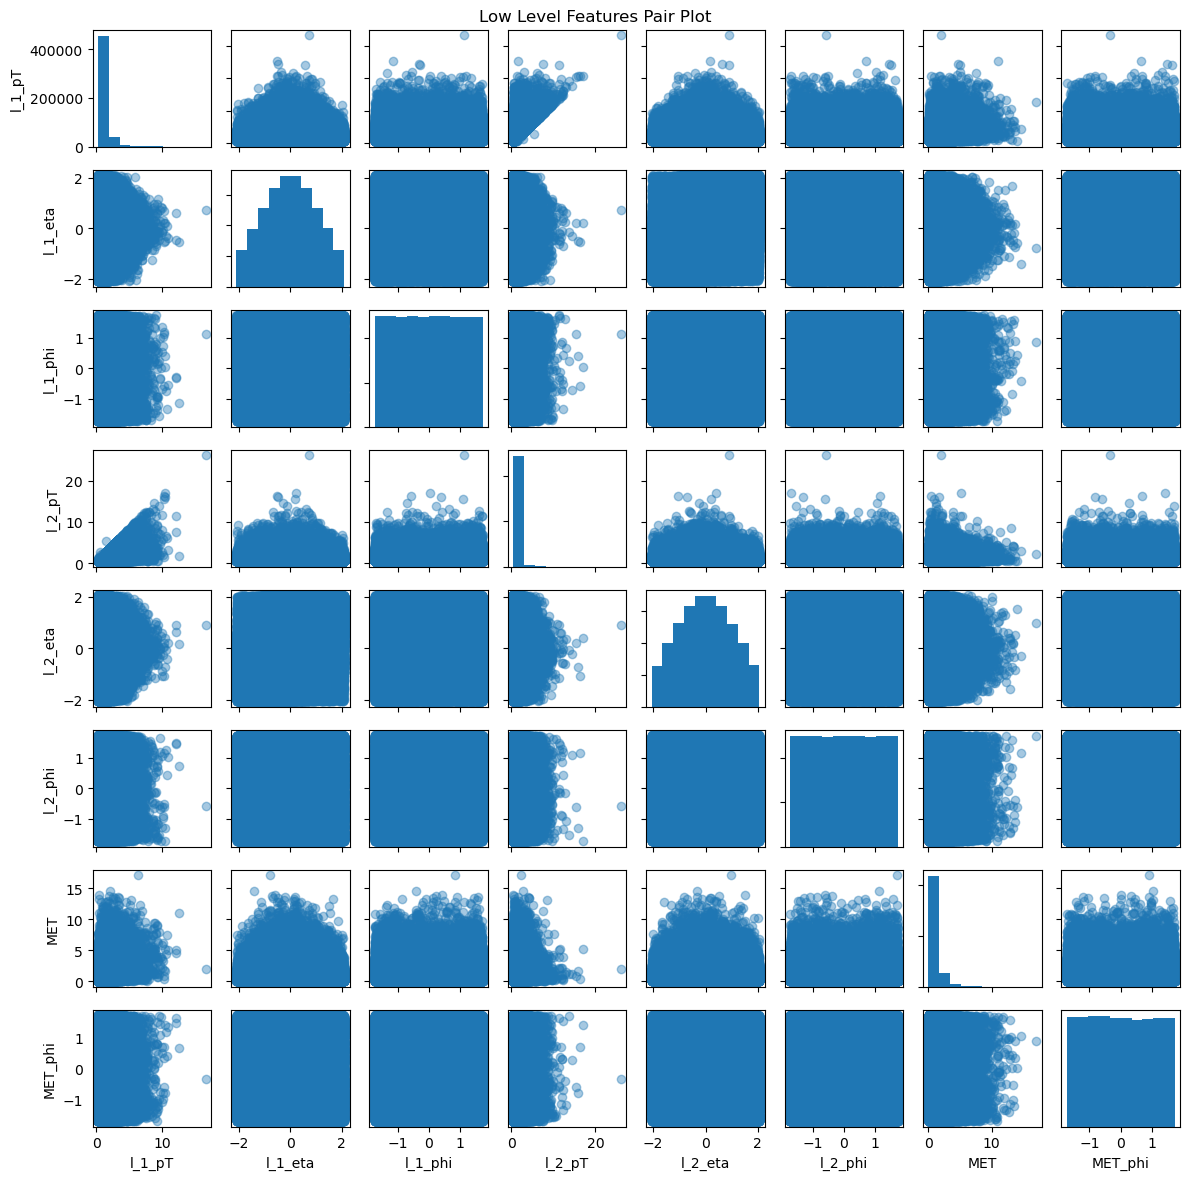

CPU times: user 16.6 s, sys: 147 ms, total: 16.7 s
Wall time: 16.2 s


In [73]:
%%time
pairplot(df,RawNames,"Low Level Features Pair Plot")

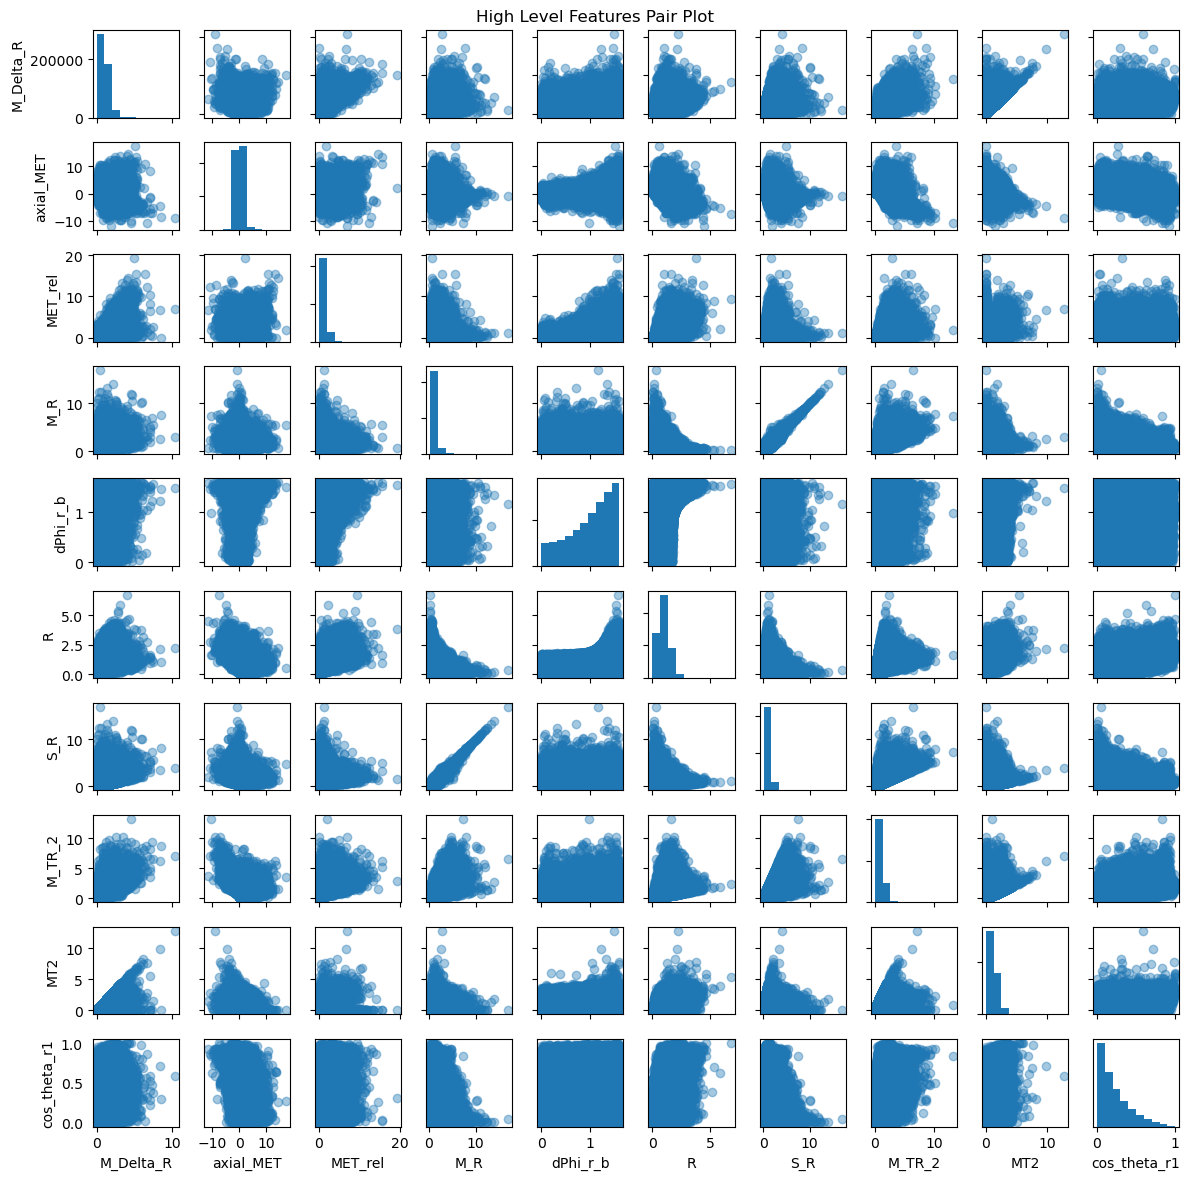

CPU times: user 25.9 s, sys: 503 ms, total: 26.4 s
Wall time: 26.1 s


In [75]:
%%time
pairplot(df,FeatureNames,"High Level Features Pair Plot")

### Part b

In [77]:
import numpy as np

def pairplot2(df,cols,title=None):
    grid_size = len(cols)
    fig,axs=plt.subplots(grid_size,grid_size,figsize=(12,12))
    
    for n,y_col in enumerate(cols):
        for m,x_col in enumerate(cols):
            if m == 0:
                axs[n,m].set_ylabel(y_col)
            else:
                axs[n,m].set_yticklabels([])
            if n == grid_size-1:
                axs[n,m].set_xlabel(x_col)
            else:
                axs[n,m].set_xticklabels([])
            
            #diagonal            
            if n == m:
                axs[n,m].hist(df[y_col])
            #non-diagonal
            else:
                axs[n,m].scatter(x=df[x_col],y=df[y_col],alpha=0.4,s=10,label="signal")
            
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

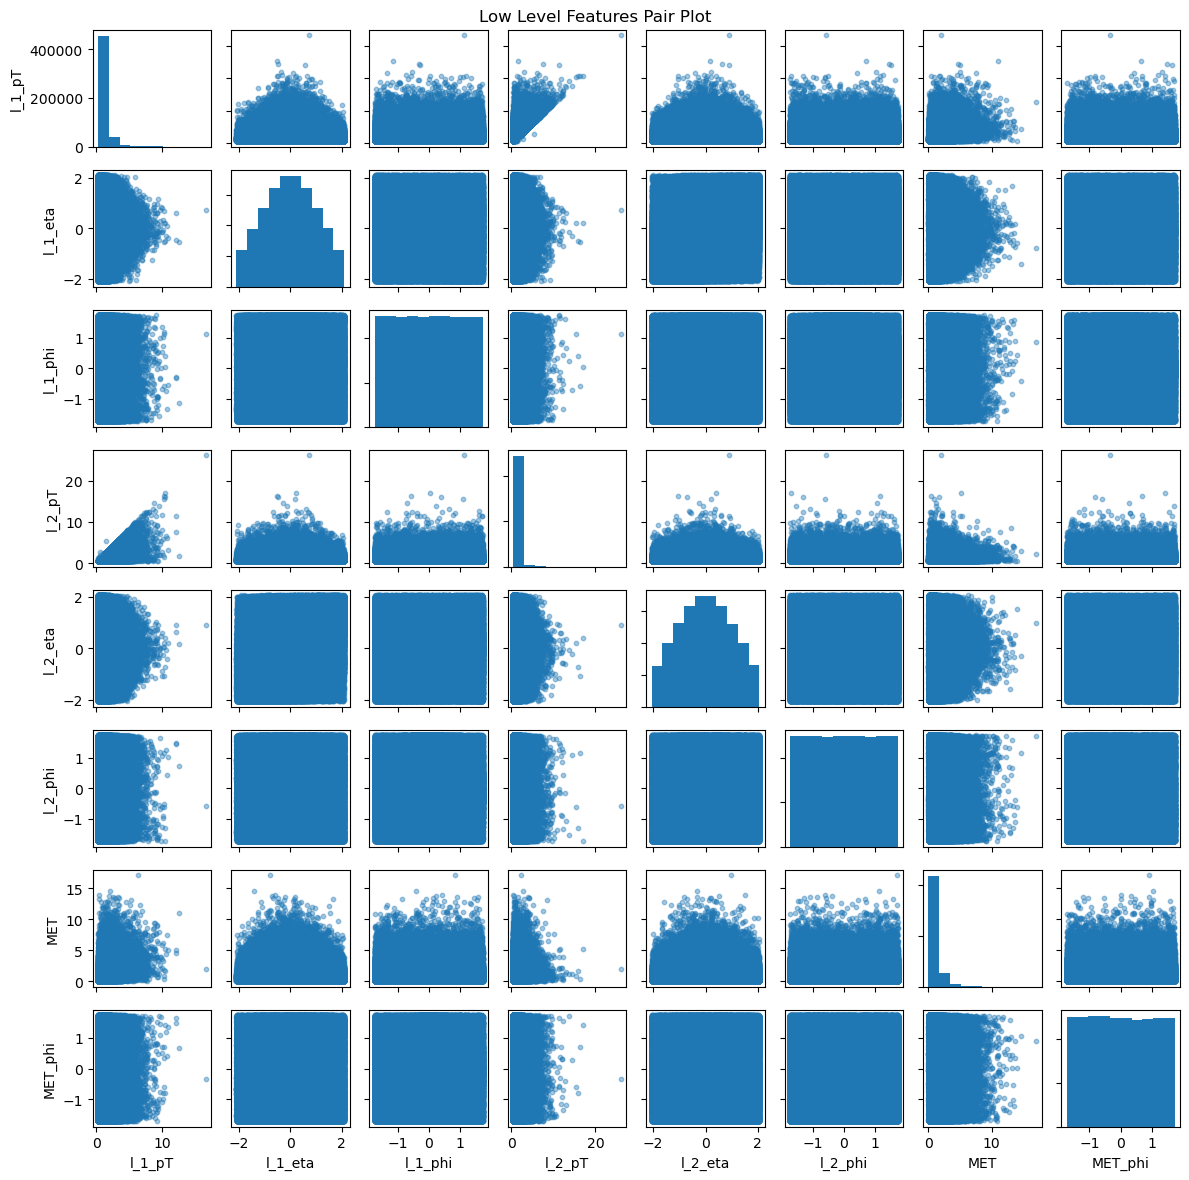

CPU times: user 9.17 s, sys: 178 ms, total: 9.35 s
Wall time: 8.29 s


In [79]:
%%time
pairplot2(df,RawNames,"Low Level Features Pair Plot")

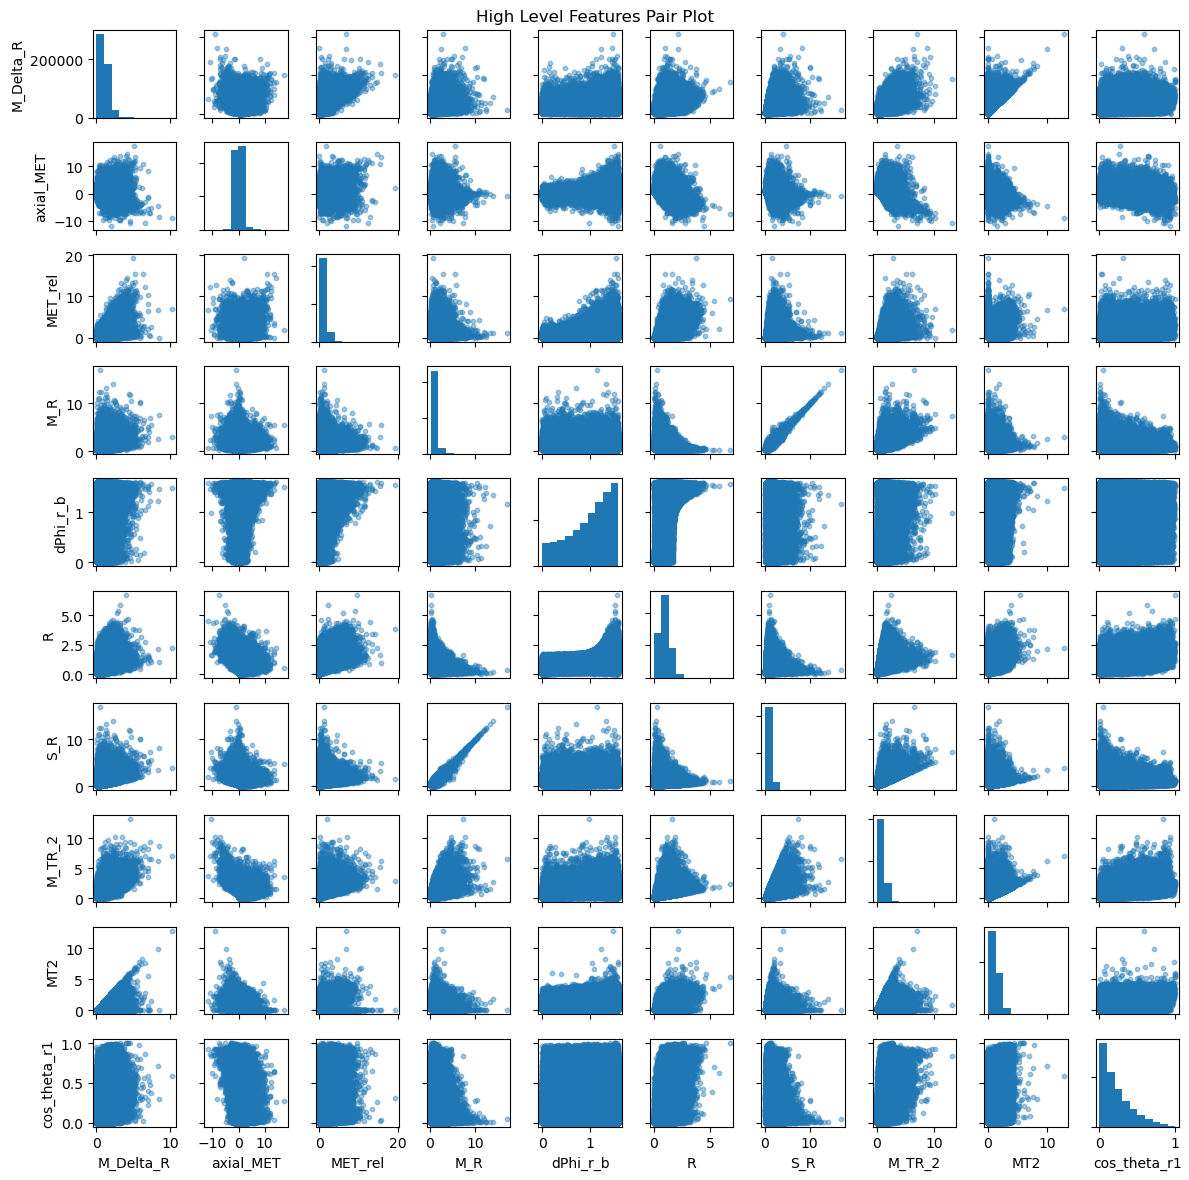

CPU times: user 13.4 s, sys: 224 ms, total: 13.6 s
Wall time: 12.6 s


In [80]:
%%time
pairplot2(df,FeatureNames,"High Level Features Pair Plot")

### Part c

In [84]:
df.shape

(500000, 19)

In [86]:
df["MET"].min()

0.0007088767597451806

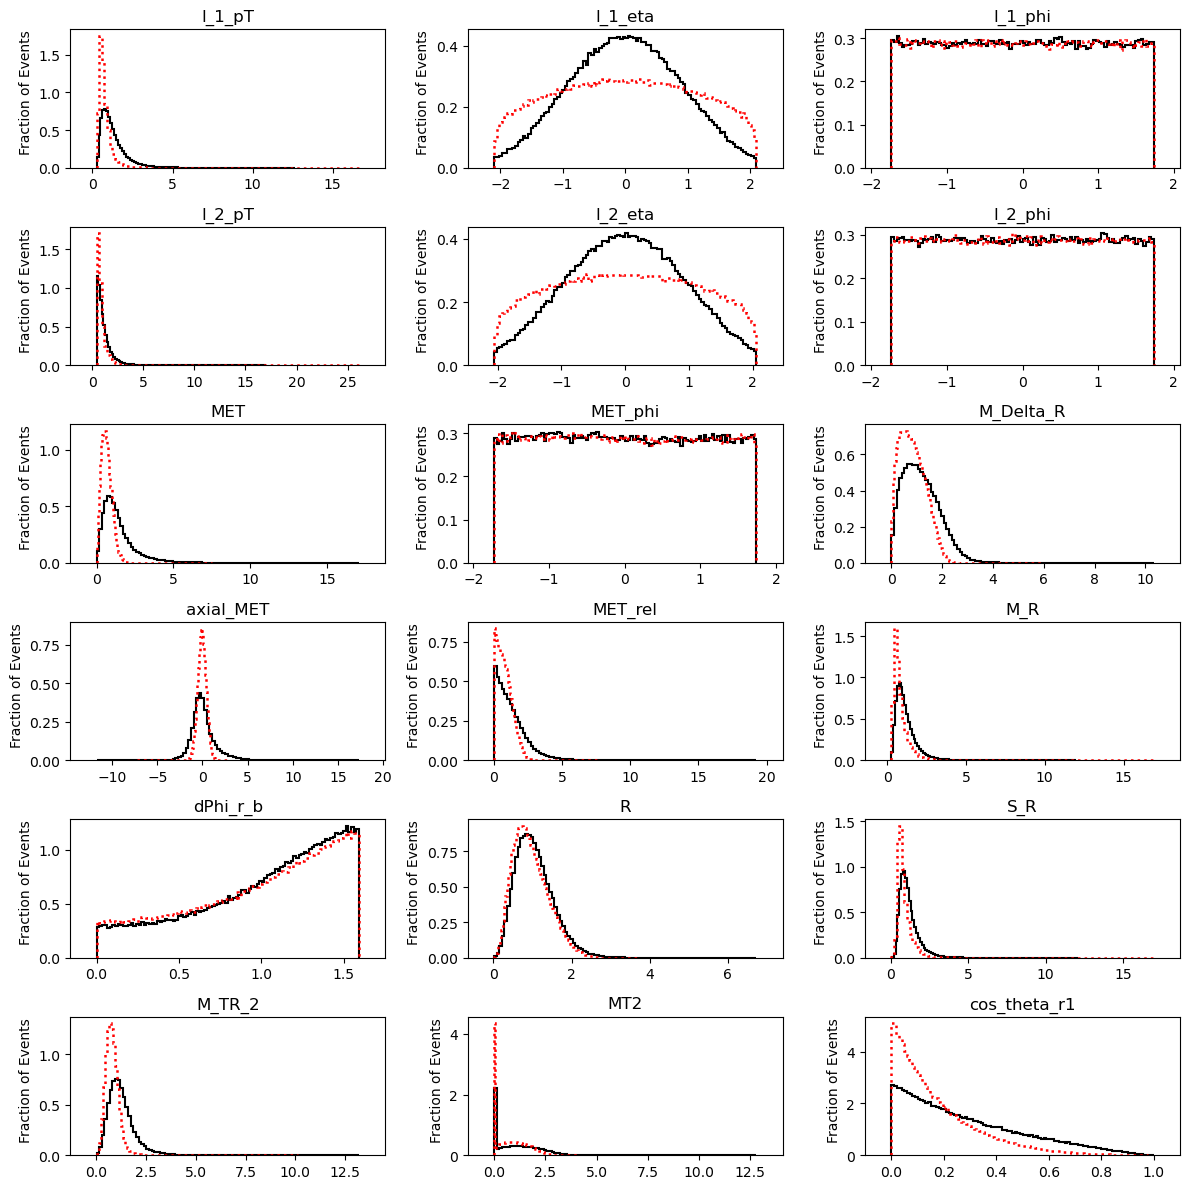

In [88]:
plt.figure(figsize=(12,12))
for ind,col in enumerate(list(RawNames)+list(FeatureNames)):
    plt.subplot(6,3,ind+1)
    plt.hist(np.array(df_sig[col]),bins=100,histtype="step", linewidth = 1.5,
             color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[col]),bins=100,histtype="step", linestyle=":",
             linewidth = 1.8, color="red", label="background",density=1,stacked=True)
    plt.ylabel("Fraction of Events",loc="top")
    plt.xlim(df[col].min()-(df[col].max()-df[col].min())*0.1,
             df[col].max()+(df[col].max()-df[col].min())*0.1)
    #plt.ylim(0,1.8)
    plt.title(col)
plt.tight_layout()
plt.show()

Features such as ``axial_MET`` and ``M_TR_2`` have signal distributions with wider ranges/longer "tails" that also have lower peaks in comparison to the background, which are good starting points for discerning the signal from the background. ``l_1_eta`` and ``l_2_eta`` have noticeably differing distributions between their signal and background variables, for instance, in each graph, the background data has a very rounded distribution with no clear tapered tails, whereas the signal data has a more normal curve and a higher peak. Features such as ``MET`` and ``l_1_pT`` show signal data with shorter peaks and a more prominently right skewed tail when compared to the background. These attributes of these various features all can act as ways to separate the background and signal observations. Even so, the distributions are relatively similar in all graphs, with much overlap (very prominent cases of this being ``R`` and ``MET_phi``), making this task difficult at the outset.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [93]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


### Part b

In [95]:
df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [97]:
import dask.dataframe as dd

df2 = dd.read_csv("SUSY-small.csv",names=VarNames)
df2.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [101]:
all_cov = df2.cov().compute()

In [105]:
print("DataFrame covariance:\n",all_cov)

DataFrame covariance:
                 signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta  \
signal        0.248277  0.133233  0.000212  0.000216  0.063916  0.000713   
l_1_pT        0.133233  0.467482 -0.000397  0.000077  0.305038 -0.000349   
l_1_eta       0.000212 -0.000397  1.004301 -0.000858 -0.000163  0.408313   
l_1_phi       0.000216  0.000077 -0.000858  1.003973  0.001313  0.000251   
l_2_pT        0.063916  0.305038 -0.000163  0.001313  0.425490 -0.000576   
l_2_eta       0.000713 -0.000349  0.408313  0.000251 -0.000576  1.006264   
l_2_phi       0.000169  0.000737 -0.001042 -0.266810  0.000156  0.000442   
MET           0.191293  0.228434 -0.002147  0.000766  0.079452  0.000382   
MET_phi      -0.000295 -0.000937 -0.000589 -0.184804 -0.001562 -0.000322   
MET_rel       0.125444  0.097524 -0.001371  0.000706 -0.000534  0.001084   
axial_MET     0.039542 -0.009733 -0.001109 -0.001873  0.051330 -0.000756   
M_R           0.084358  0.364432 -0.000554  0.001063  0.325434 -0

In [109]:
low_cov = df2[RawNames].cov().compute()
high_cov = df2[FeatureNames].cov().compute()

In [111]:
all_corr = df2.corr().compute()
low_corr = df2[RawNames].corr().compute()
high_corr = df2[FeatureNames].corr().compute()

### Part c

In [144]:
print("Covariance of all columns")
display(HTML(tabulate.tabulate(all_cov, tablefmt='html', headers=VarNames,)))

Covariance of all columns


,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
signal,0.248277,0.133233,0.000212326,0.000216279,0.0639161,0.000712814,0.000169378,0.191293,-0.000294539,0.125444,0.0395417,0.0843579,0.123326,0.0255957,0.0341363,0.080615,0.0851836,0.00712762,0.0261996
l_1_pT,0.133233,0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714,0.097524,-0.00973254,0.364432,0.287223,-0.0597025,-0.0123988,0.342587,0.0977389,-0.0469491,0.0221632
l_1_eta,0.000212326,-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968,-0.00137057,-0.00110889,-0.000553827,-0.00066892,0.0003013,0.000427123,-0.00060401,-0.000987471,-0.00074033,0.000321632
l_1_phi,0.000216279,7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804,0.000706206,-0.00187269,0.00106307,0.000868783,0.000201596,0.00106029,0.00146377,0.000901233,0.000994306,0.000259098
l_2_pT,0.0639161,0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177,-0.000533893,0.0513299,0.325434,0.162941,-0.0993511,-0.0688858,0.32194,0.00571563,-0.00383465,-0.0279102
l_2_eta,0.000712814,-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449,0.00108429,-0.000756451,-0.000607671,1.88755e-05,0.000320625,0.00139889,-0.000678582,0.000670436,-0.000306871,0.000296341
l_2_phi,0.000169378,0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343,0.00144703,-0.0018005,0.000759915,0.00050892,0.000551145,0.00225915,0.000906438,0.0013266,-0.000241209,3.70399e-05
MET,0.191293,0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213,0.546481,0.153956,0.144522,0.365194,0.187912,0.154785,0.165543,0.315143,0.145682,0.0730924
MET_phi,-0.000294539,-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331,-0.0048952,-0.000441791,-0.00148315,-0.001201,-0.00022953,8.38685e-05,-0.00170675,-0.000569851,-0.00170906,0.000119405
MET_rel,0.125444,0.097524,-0.00137057,0.000706206,-0.000533893,0.00108429,0.00144703,0.546481,-0.0048952,0.790489,-0.119851,0.0436845,0.301993,0.248824,0.408779,0.0823154,0.414743,0.146439,0.0553179


In [146]:
print("Covariance of low-level columns")
display(HTML(tabulate.tabulate(low_cov, tablefmt='html', headers=VarNames,)))

Covariance of low-level columns


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714
l_1_eta,-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968
l_1_phi,7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804
l_2_pT,0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177
l_2_eta,-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449
l_2_phi,0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343
MET,0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213
MET_phi,-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331


In [148]:
print("Covariance of high-level columns")
display(HTML(tabulate.tabulate(high_cov, tablefmt='html', headers=VarNames,)))

Covariance of high-level columns


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET
M_Delta_R,0.388624,-0.233074,0.414743,0.07393,0.0422407,0.165483,0.0957808,0.241865,0.432897,0.0392089
axial_MET,-0.233074,1.00537,-0.119851,0.0171346,-0.0251128,-0.1809,-0.0413828,-0.185017,-0.460999,-0.0537349
MET_rel,0.414743,-0.119851,0.790489,0.0436845,0.146439,0.248824,0.0823154,0.301993,0.408779,0.0553179
M_R,0.07393,0.0171346,0.0436845,0.392167,-0.0289617,-0.112904,0.379763,0.209875,-0.0365444,-0.0143412
dPhi_r_b,0.0422407,-0.0251128,0.146439,-0.0289617,0.190188,0.0870914,-0.00345651,0.058133,0.0208972,0.00908347
R,0.165483,-0.1809,0.248824,-0.112904,0.0870914,0.221578,-0.0833587,0.104014,0.2321,0.0581608
S_R,0.0957808,-0.0413828,0.0823154,0.379763,-0.00345651,-0.0833587,0.382015,0.228125,-0.0110375,-0.0103629
M_TR_2,0.241865,-0.185017,0.301993,0.209875,0.058133,0.104014,0.228125,0.337827,0.18917,0.0516659
MT2,0.432897,-0.460999,0.408779,-0.0365444,0.0208972,0.2321,-0.0110375,0.18917,0.737661,0.0446289
cos_theta_r1,0.0392089,-0.0537349,0.0553179,-0.0143412,0.00908347,0.0581608,-0.0103629,0.0516659,0.0446289,0.0388299


In [150]:
print("Correlation of all columns")
display(HTML(tabulate.tabulate(all_corr, tablefmt='html', headers=VarNames,)))

Correlation of all columns


,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
signal,1,0.391075,0.000425208,0.000433197,0.196651,0.0014261,0.000339286,0.439725,-0.000590141,0.283162,0.0791449,0.270347,0.425832,0.109128,0.0797663,0.261762,0.274235,0.0328008,0.266836
l_1_pT,0.391075,1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775,0.160428,-0.0141965,0.851136,0.722754,-0.185501,-0.021114,0.810678,0.229309,-0.157454,0.164501
l_1_eta,0.000425208,-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735,-0.00153823,-0.00110355,-0.000882483,-0.0011484,0.00063871,0.000496241,-0.000975151,-0.00158062,-0.00169395,0.00162871
l_1_phi,0.000433197,0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133,0.000792725,-0.00186398,0.0016942,0.00149177,0.000427422,0.00123207,0.00236358,0.00144282,0.00227545,0.00131226
l_2_pT,0.196651,0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031,-0.000920581,0.0784805,0.796679,0.429772,-0.323567,-0.122958,0.798528,0.0140558,-0.01348,-0.217138
l_2_eta,0.0014261,-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913,0.00121574,-0.000752075,-0.000967334,3.2374e-05,0.000679012,0.00162368,-0.00109448,0.0010721,-0.000701469,0.00149917
l_2_phi,0.000339286,0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088,0.00162445,-0.00179228,0.00121117,0.000873935,0.00116864,0.00262539,0.00146378,0.00212398,-0.000552051,0.000187613
MET,0.439725,0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278,0.70401,0.175867,0.264332,0.719661,0.457239,0.20642,0.306776,0.579022,0.382618,0.424855
MET_phi,-0.000590141,-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1,-0.00549673,-0.000439881,-0.00236446,-0.0020629,-0.000486809,9.74883e-05,-0.00275684,-0.000912596,-0.00391244,0.000604952
MET_rel,0.283162,0.160428,-0.00153823,0.000792725,-0.000920581,0.00121574,0.00162445,0.70401,-0.00549673,1,-0.134441,0.0784593,0.584388,0.594539,0.535318,0.149794,0.748284,0.377675,0.315743


In [152]:
print("Correlation of low-level columns")
display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=VarNames,)))

Correlation of low-level columns


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775
l_1_eta,-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735
l_1_phi,0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133
l_2_pT,0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031
l_2_eta,-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913
l_2_phi,0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088
MET,0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278
MET_phi,-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1


In [154]:
print("Correlation of high-level columns")
display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=VarNames,)))

Correlation of high-level columns


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET
M_Delta_R,1,-0.372877,0.748284,0.189374,0.155372,0.56393,0.248584,0.667515,0.808521,0.31918
axial_MET,-0.372877,1,-0.134441,0.0272881,-0.0574301,-0.383276,-0.0667754,-0.317468,-0.535313,-0.271963
MET_rel,0.748284,-0.134441,1,0.0784593,0.377675,0.594539,0.149794,0.584388,0.535318,0.315743
M_R,0.189374,0.0272881,0.0784593,1,-0.106046,-0.383011,0.981155,0.576603,-0.0679449,-0.116216
dPhi_r_b,0.155372,-0.0574301,0.377675,-0.106046,1,0.424248,-0.0128235,0.229342,0.0557916,0.1057
R,0.56393,-0.383276,0.594539,-0.383011,0.424248,1,-0.286515,0.380174,0.574095,0.627024
S_R,0.248584,-0.0667754,0.149794,0.981155,-0.0128235,-0.286515,1,0.635017,-0.0207923,-0.085086
M_TR_2,0.667515,-0.317468,0.584388,0.576603,0.229342,0.380174,0.635017,1,0.378944,0.4511
MT2,0.808521,-0.535313,0.535318,-0.0679449,0.0557916,0.574095,-0.0207923,0.378944,1,0.263697
cos_theta_r1,0.31918,-0.271963,0.315743,-0.116216,0.1057,0.627024,-0.085086,0.4511,0.263697,1


### Part d

In [209]:
def tabulate_matrix(df,cols):
    from IPython.display import HTML, display
    import tabulate
    df_ = dd.from_pandas(df[cols])

    cov_dfcols = df_.cov().compute()
    corr_dfcols = df_.corr().compute()

    print("Covariance:")
    display(HTML(tabulate.tabulate(cov_dfcols, tablefmt='html', headers=cols)))
    print("Correlation:")
    display(HTML(tabulate.tabulate(corr_dfcols, tablefmt='html', headers=cols)))

In [211]:
tabulate_matrix(df, RawNames)
                #Im not sure why this raises an error, it seems to work otherwise

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:121:

Covariance:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714
l_1_eta,-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968
l_1_phi,7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804
l_2_pT,0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177
l_2_eta,-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449
l_2_phi,0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343
MET,0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213
MET_phi,-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331


Correlation:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775
l_1_eta,-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735
l_1_phi,0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133
l_2_pT,0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031
l_2_eta,-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913
l_2_phi,0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088
MET,0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278
MET_phi,-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 